In [120]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lg
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
from sklearn.decomposition import FastICA

In [121]:
x = linspace(0, 8000, 8000)  # возвращает равномерно распределённые числа в данном интервале

a0 = 1
a1 = 0.75
a2 = 4.75
w0 = 0.18
w1 = 0.178
w2 = 0.02
k = 0.0000002

data_1 = (np.random.random(1000))

# T= 2*pi
f1 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.00) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00) + a2*sin(2 * pi * w2 * x + 2 * pi * 0.00)) + [x for x in (np.random.rand(8000) - 0.5)]
f2 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + a2*sin(2 * pi * w2 * x + 2 * pi * 0.00425)) + [x for x in (np.random.rand(8000) - 0.5)]
f3 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + a2*sin(2 * pi * w2 * x + 2 * pi * 0.0085)) + [x for x in (np.random.rand(8000) - 0.5)]
f4 = np.exp(-k*x**2)*(a0*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + a2*sin(2 * pi * w2 * x + 2 * pi * 0.01275)) + [x for x in (np.random.rand(8000) - 0.5)]
Mas = np.c_[f1, f2, f3, f4]


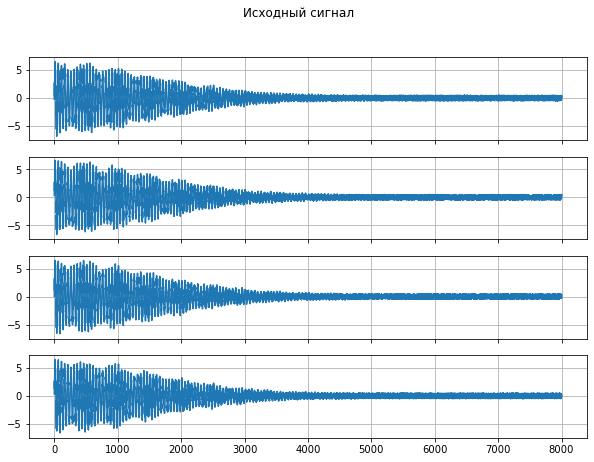

In [122]:
nrows, ncols = 4, 1
figsize = [10, 7]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Исходный сигнал')
ax[0].plot(x, f1)
ax[0].grid(True)
ax[1].plot(x, f2)
ax[1].grid(True)
ax[2].plot(x, f3)
ax[2].grid(True)
ax[3].plot(x, f4)
ax[3].grid(True)

plt.show()


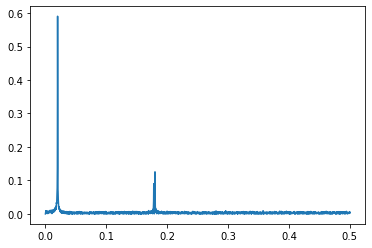

In [123]:
spectrs = rfft(f1 - np.mean(f1)) / (len(x))
nu = rfftfreq(8000, 1.)
plt.plot(nu, np.abs(spectrs))

In [124]:
Mas2 = np.delete(Mas, (0), axis=0)
Mas2 = np.vstack([Mas2, [0, 0, 0, 0]])
print(Mas2.shape)
Mas = np.concatenate((Mas, Mas2), axis=1)
print(Mas.shape)

(8000, 4)
(8000, 8)


In [125]:
U, sng, Mas_SVD = lg.svd(Mas.T, full_matrices=False)
print(Mas_SVD.shape)
print(U.shape)
print(sng.shape)
#spectrf = rfft(Mas_SVD - np.mean(Mas_SVD)) / (len(x))
nu = rfftfreq(8000, 1.)


(8, 8000)
(8, 8)
(8,)


(8000,)
0.02
0.18
0.02
0.408625
0.075
0.424875
0.099625
0.385


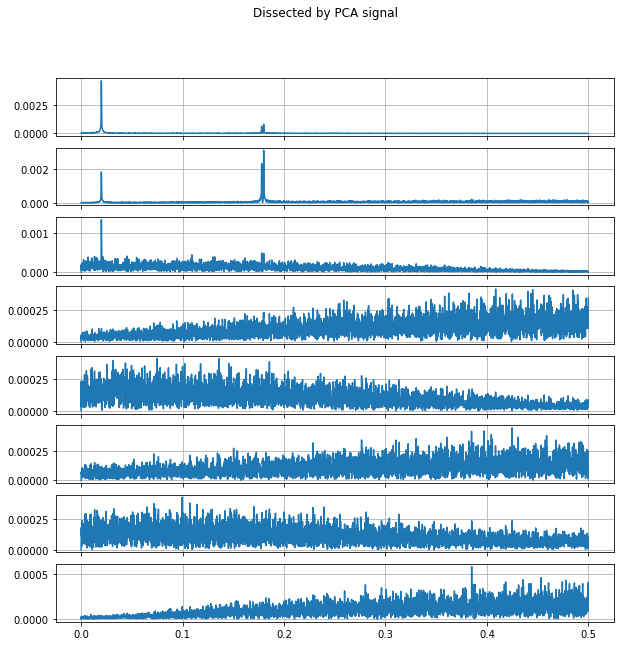

In [127]:
fig, ax = plt.subplots(nrows=8, ncols=ncols, figsize=[10, 10], sharex=True)
fig.suptitle('Dissected by PCA signal')
print(Mas_SVD[1, :].shape)
for i in range(Mas_SVD.shape[0]):
    spectrf = rfft(Mas_SVD[i, :] - np.mean(Mas_SVD[i, :])) / (len(Mas_SVD[i, :]))
    ax[i].plot(nu, np.abs(spectrf))
    print(nu[np.argmax(np.abs(spectrf), axis=0)])
    
    #ax[i].plot(x,np.abs(S_[:, i]))
    ax[i].grid(True)


axes = plt.gca()
#axes.set_xlim([0, 0.185])
#plt.tight_layout()
plt.show()